In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_frame = pd.read_csv("adult.csv", skipinitialspace=True)

1. Analysis  the  distribution  of  all  work  classes  for  different  genders  using an appropriate visualization technique.  Use appropriate features for your visualization, See Figure 4. Note that you might need to add more features to this visualization e.g., labels, legend etc..

In [3]:
df1 = data_frame[data_frame.workclass != '?']

In [4]:
sf = df1[['sex', 'workclass']]
males = sf['workclass'][sf['sex']=='Male']
females = sf['workclass'][sf['sex']=='Female']

In [5]:
groups = sf.groupby(['workclass', 'sex']).size().unstack(fill_value=0)

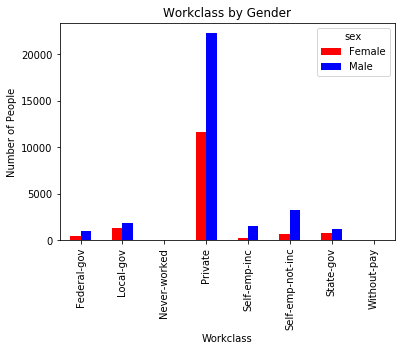

In [36]:
graph1 = groups.plot(kind='bar', color = ['r', 'b'])
graph1.set_xlabel('Workclass')
graph1.set_ylabel('Number of People')
graph1.set_title('Workclass by Gender')
plt.show()

2. Investigate the relationship between the level of education and their hours of work per week for females only.   Which education level has a larger variety of working hours? Use a visualization technique with appropriate features to show the result.

In [11]:
data_frame = pd.read_csv("adult.csv", skipinitialspace=True)
df2 = data_frame[data_frame.sex != 'Male']

In [12]:
df2 = df2[['education','hours-per-week']]
df2.head()

,education,hours-per-week
4,Bachelors,40.0
5,Masters,40.0
6,9th,16.0
8,Masters,50.0
12,Bachelors,30.0


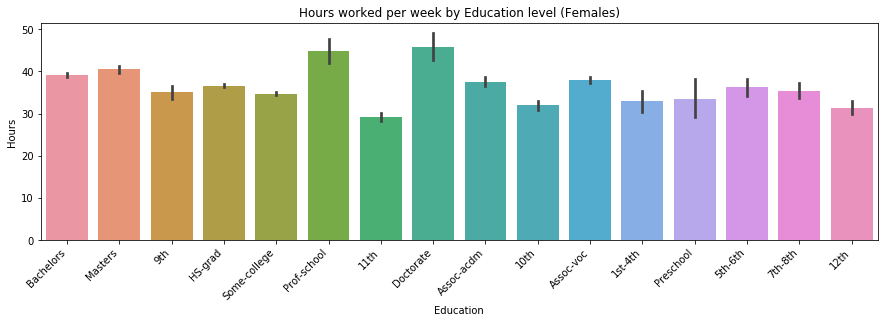

In [35]:
graph2 = sns.barplot(x='education', y='hours-per-week', data=df2)
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=45, horizontalalignment='right')
graph2.set_xlabel('Education')
graph2.set_ylabel('Hours')
graph2.set_title('Hours worked per week by Education level (Females)')
graph2.figure.set_size_inches(15, 4)
plt.show()

3. Use a visualization technique and depict which country has the maximum entry in the dataset.

In [16]:
df3 = data_frame[data_frame['native-country'] != '?']
df3 = df3['native-country']

In [17]:
df3.value_counts().head()
df3 = df3.value_counts().head()
print(df3)

United-States    43832
Mexico             951
Philippines        295
Germany            206
Puerto-Rico        184
Name: native-country, dtype: int64


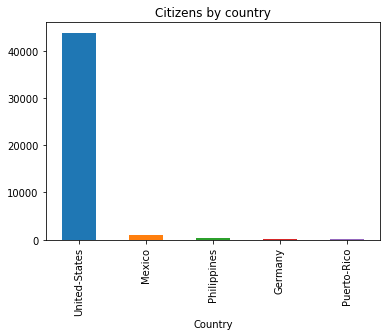

In [18]:
graph3 = df3.plot(x='Country', y='Number of people', kind='bar')
graph3.set_xlabel("Country")
graph3.set_title("Citizens by country")
plt.show()

4. Repeat the previous analysis but this time exclude the country which has the maximum entry and depict which two countries have the maximum of entries

In [19]:
df4 = data_frame[data_frame['native-country'] != '?']
df4.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,0.0,0.0,40.0,Cuba,<=50K


In [20]:
df4 = df4['native-country']
df4.value_counts().head()
df4 = df4.value_counts()

In [21]:
df4 = df4.drop(df4.index[0])
df4 = df4.head()

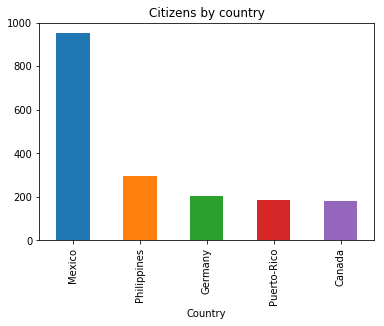

In [23]:
graph4 = df4.plot(x='Country', y='Number of people', kind='bar')
graph4.set_xlabel("Country")
graph4.set_title("Citizens by country")
plt.show()

5. Investigate the relationship between age and working hours.  Use a visualization technique with appropriate features to show the result.  Which age interval has higher working hours.  Use annotation and show a point that has relatively the maximum working hours.

In [25]:
df5 = data_frame[['age', 'hours-per-week']]
df5.head()

,age,hours-per-week
0,39.0,40.0
1,50.0,13.0
2,38.0,40.0
3,53.0,40.0
4,28.0,40.0


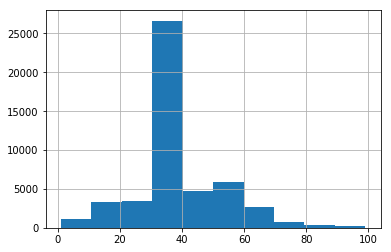

In [26]:
graph5 = df5['hours-per-week'].hist(bins=10)


In [30]:
df6 = data_frame[['age', 'hours-per-week']]
df6 = df6.groupby('age')['hours-per-week'].mean()

In [32]:
yPoint = df6.max()
xPoint = df6.loc[df6 == yPoint]
print(yPoint, xPoint)

44.13308341143393 age
44.0    44.133083
Name: hours-per-week, dtype: float64


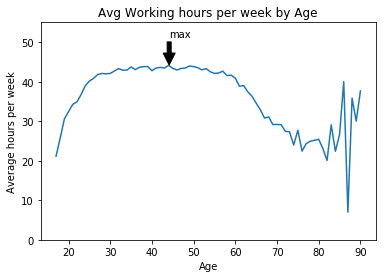

In [37]:
graph6 = df6.plot()
graph6.set_xlabel('Age')
graph6.set_ylabel('Average hours per week')
graph6.set_title('Avg Working hours per week by Age')
graph6.annotate('max', xy=(xPoint, yPoint), xytext=(xPoint, yPoint+7), arrowprops=dict(facecolor='black', shrink=0.01))
graph6.set_ylim(0, 55)
plt.show()